## Case Study: Classification of Fraudulant and non Fraudulant Customers

### Column Descriptions
Feature Important for Model Possible Values
Region 1  - 8 regions - NE,NW,SE,SW,E,W,N,S
State 1 -Names fo state
Area 1 -Urban,Rural
City 1 -Hyderabad,Delhi,Goa
Consumer profile/ type 1 -Business customer /Personal
Product category 1 -Entertainment / Household
Product type 1 -TV / AC
Part number / Issue category 1 0- -No issue / No componenent, 1- repair, 2-replacement
Claim value 1 -would we have this value during claim process, probably an approximate claim value could be tagged
Service centre 1 -Service Centre code (10,11,12,13,14,15)
Age in days 1 -Age of the product
Purchased from 1 -Dealer,Manufacturer,Internet
Call details 1 -Call duration in minutes
Purpose 1 -Claim,Complaint,Other
Fraud (1 if Fraud else 0) 1 1 or 0 : - Fraud-1 Non-Fraud-0

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Project\\Warranty Claim.csv")
Warranty=data.copy()
data.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [3]:
data.shape

(358, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        358 non-null    int64  
 1   Region            358 non-null    object 
 2   State             358 non-null    object 
 3   Area              358 non-null    object 
 4   City              358 non-null    object 
 5   Consumer_profile  358 non-null    object 
 6   Product_category  358 non-null    object 
 7   Product_type      358 non-null    object 
 8   AC_1001_Issue     358 non-null    int64  
 9   AC_1002_Issue     358 non-null    int64  
 10  AC_1003_Issue     358 non-null    int64  
 11  TV_2001_Issue     358 non-null    int64  
 12  TV_2002_Issue     358 non-null    int64  
 13  TV_2003_Issue     358 non-null    int64  
 14  Claim_Value       358 non-null    float64
 15  Service_Centre    358 non-null    int64  
 16  Product_Age       358 non-null    int64  
 1

In [5]:
data.describe()

,Unnamed: 0,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,370.094972,0.332402,0.329609,0.203911,0.377095,0.452514,0.268156,11994.534916,12.812849,201.843575,11.931844,0.097765
std,1344.035904,0.629446,0.615182,0.529559,0.621943,0.670910,0.508353,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000,0.000000
25%,128.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,217.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,306.750000,0.000000,0.750000,0.000000,1.000000,1.000000,0.000000,15000.000000,15.000000,303.750000,23.000000,0.000000
max,11797.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000,1.000000


In [6]:
data[data.isnull()].shape

(358, 21)

In [7]:
data.isnull().sum()

Unnamed: 0          0
Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [8]:
data.nunique()

Unnamed: 0          358
Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

In [9]:
data[data.duplicated()].shape

(0, 21)

In [10]:
data=data.drop(data.columns[0], axis = 1) 

In [11]:
data.shape

(358, 20)

In [12]:
data['Fraud'].unique()

array([1, 0], dtype=int64)

### visualization

In [13]:
feature=data.columns
feature

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

In [14]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!="O"]
numerical_features

['AC_1001_Issue',
 'AC_1002_Issue',
 'AC_1003_Issue',
 'TV_2001_Issue',
 'TV_2002_Issue',
 'TV_2003_Issue',
 'Claim_Value',
 'Service_Centre',
 'Product_Age',
 'Call_details',
 'Fraud']

In [15]:
feature_na=[feature for feature in data.columns if data[feature].isnull]
for feature in feature_na:
    print(feature, np.round(data[feature].isnull().mean(), 4), "%of missing values")

Region 0.0 %of missing values
State 0.0 %of missing values
Area 0.0 %of missing values
City 0.0 %of missing values
Consumer_profile 0.0 %of missing values
Product_category 0.0 %of missing values
Product_type 0.0 %of missing values
AC_1001_Issue 0.0 %of missing values
AC_1002_Issue 0.0 %of missing values
AC_1003_Issue 0.0 %of missing values
TV_2001_Issue 0.0 %of missing values
TV_2002_Issue 0.0 %of missing values
TV_2003_Issue 0.0 %of missing values
Claim_Value 0.0 %of missing values
Service_Centre 0.0 %of missing values
Product_Age 0.0 %of missing values
Purchased_from 0.0 %of missing values
Call_details 0.0 %of missing values
Purpose 0.0 %of missing values
Fraud 0.0 %of missing values


In [16]:
descrete_features=[feature for feature in numerical_features if len(data[feature].unique())<25]
descrete_features

['AC_1001_Issue',
 'AC_1002_Issue',
 'AC_1003_Issue',
 'TV_2001_Issue',
 'TV_2002_Issue',
 'TV_2003_Issue',
 'Service_Centre',
 'Fraud']

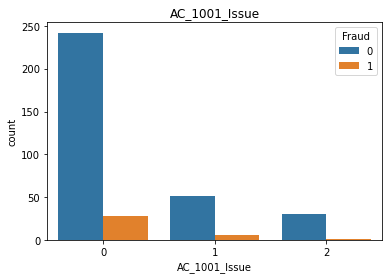

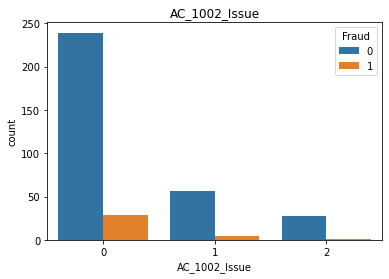

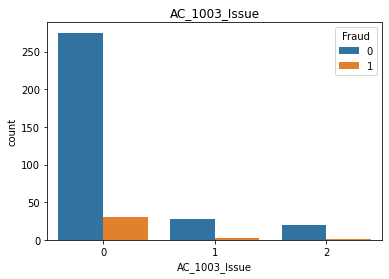

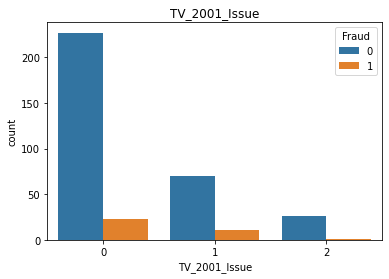

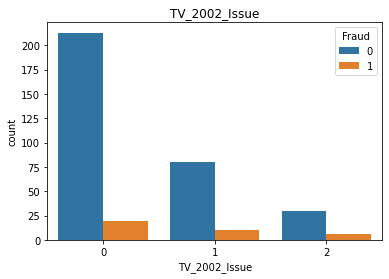

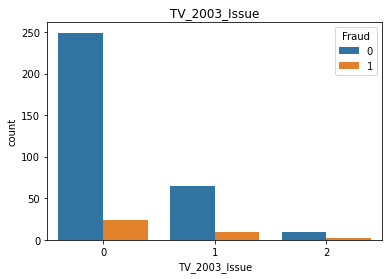

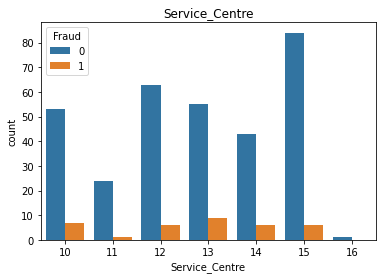

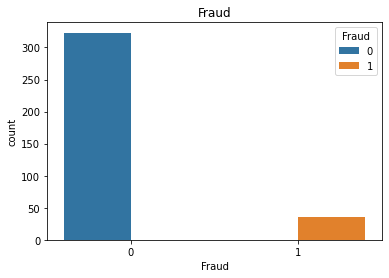

In [17]:
for feature in descrete_features:
    df=data.copy()
    sns.countplot(x=feature,data=data, hue="Fraud")
    #df[feature].value_counts().plot.bar()
    plt.title(feature)
    plt.show()

In [18]:
contineous_features=[feature for feature in numerical_features if feature not in descrete_features]
contineous_features

['Claim_Value', 'Product_Age', 'Call_details']

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


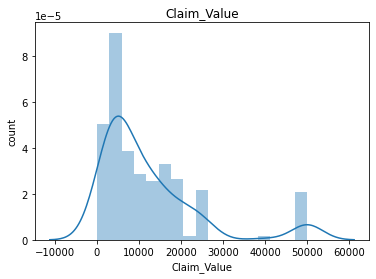

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


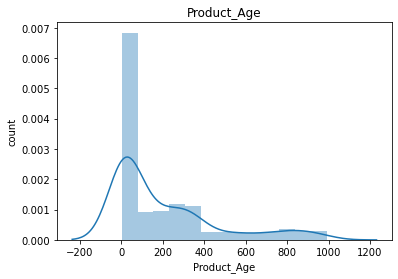

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


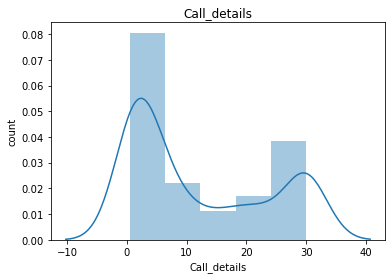

In [19]:
for feature in contineous_features:
    df=data.copy()
    #df[feature].hist(bins=20)
    sns.distplot(x=df[feature])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()
    

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


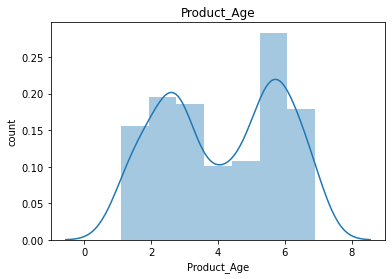

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


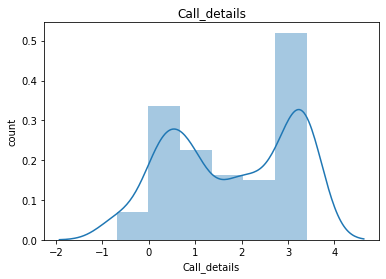

In [20]:
for feature in contineous_features:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
         #np.log(df[feature])
         sns.distplot(np.log(df[feature]))
         plt.title(feature)
         plt.xlabel(feature)
         plt.ylabel("count")
         plt.show()
        
    
   
    

In [21]:
object_features = [feature for feature in data.columns if data[feature].dtype =="O"]
object_features

['Region',
 'State',
 'Area',
 'City',
 'Consumer_profile',
 'Product_category',
 'Product_type',
 'Purchased_from',
 'Purpose']

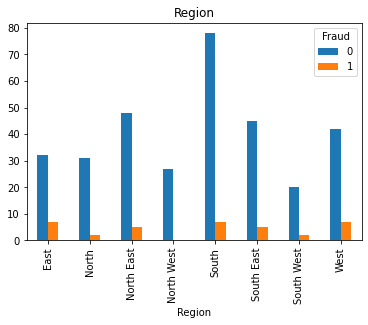

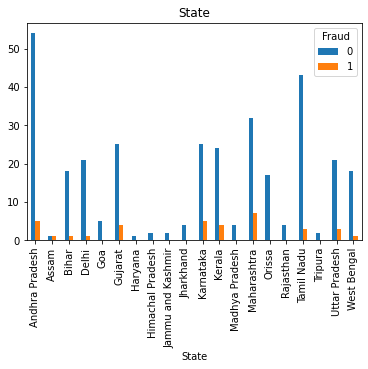

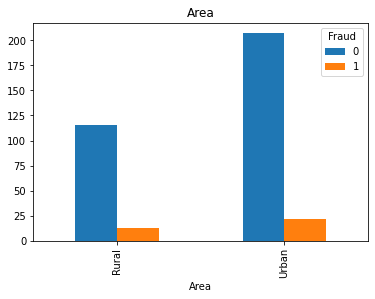

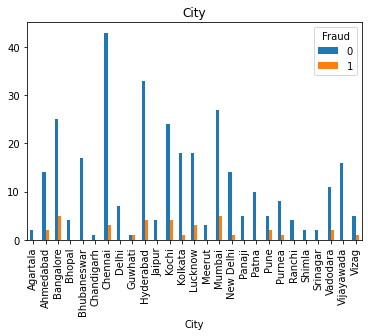

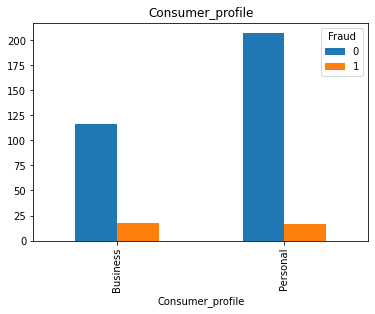

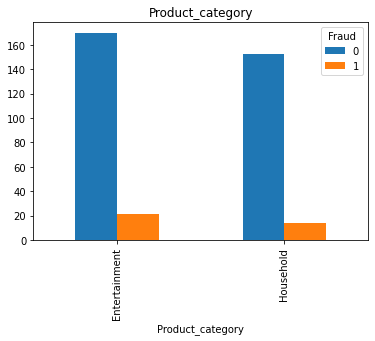

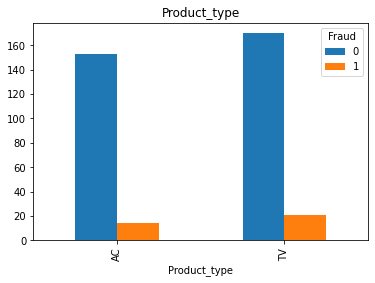

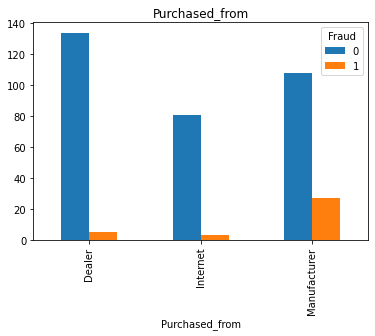

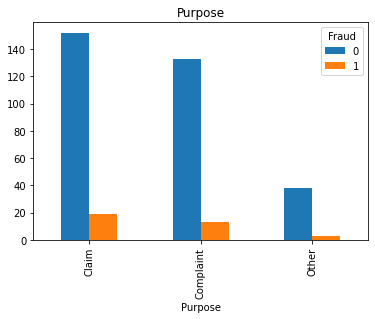

In [22]:
for feature in object_features:
    df=data.copy()
    pd.crosstab(df[feature], df["Fraud"]).plot(kind="bar")
    #df.groupby(feature)["Fraud"].mean().plot.bar()
    plt.title(feature)
    plt.show()

### Outlier  

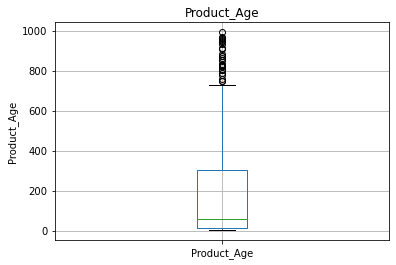

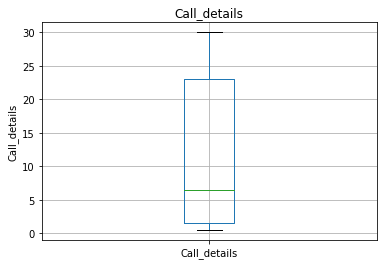

In [23]:
for feature in contineous_features:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
            
        
     
       

In [24]:
 data['Claim_Value'] = data['Claim_Value'].replace(0,data['Claim_Value'].mean()) 
data.tail()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
353,East,Tamil Nadu,Rural,Chennai,Personal,Entertainment,TV,0,0,0,0,0,0,11994.534916,13,3,Manufacturer,0.5,Complaint,0
354,North East,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,1,1,1,11994.534916,15,12,Manufacturer,1.6,Complaint,0
355,South,Tamil Nadu,Urban,Chennai,Personal,Entertainment,TV,0,0,0,2,0,0,11994.534916,15,254,Dealer,9.0,Claim,0
356,East,Uttar Pradesh,Urban,Lucknow,Personal,Household,AC,1,1,1,0,0,0,50000.000000,13,12,Manufacturer,1.5,Claim,1
357,South,Andhra Pradesh,Urban,Vijayawada,Personal,Household,AC,2,2,2,0,0,0,11994.534916,15,303,Internet,7.0,Complaint,0


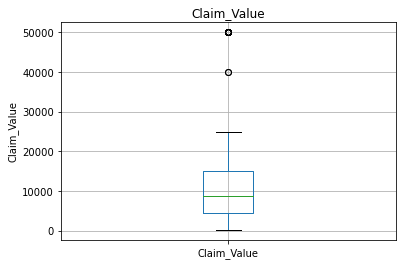

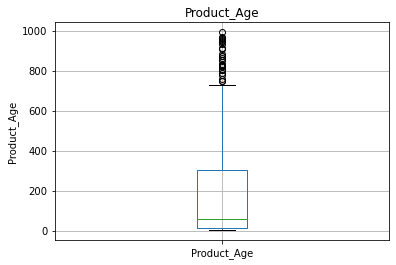

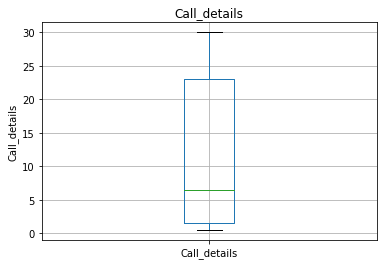

In [25]:
for feature in contineous_features:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
            

### Relationship analysis with output variable

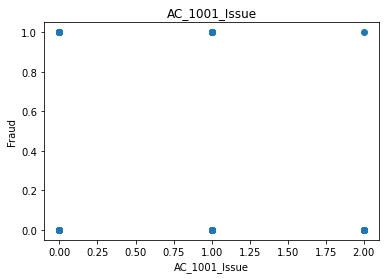

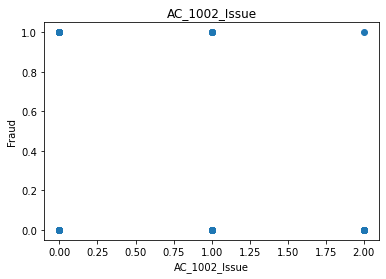

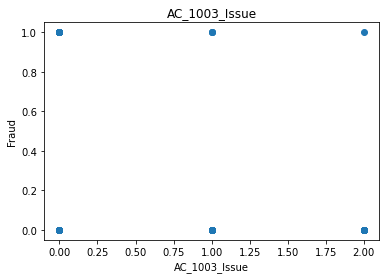

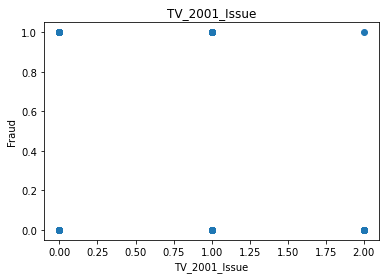

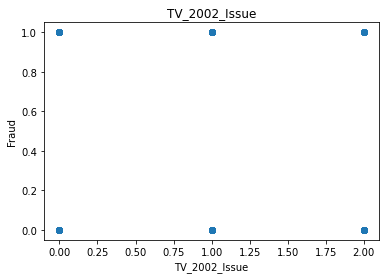

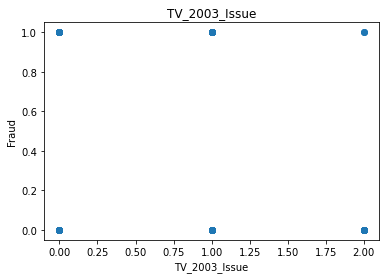

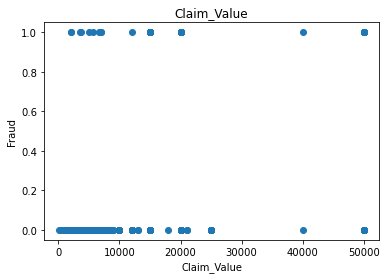

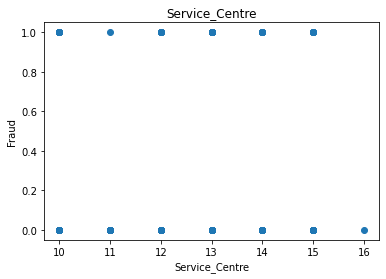

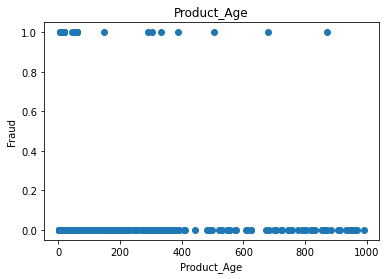

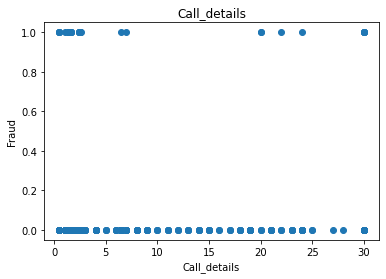

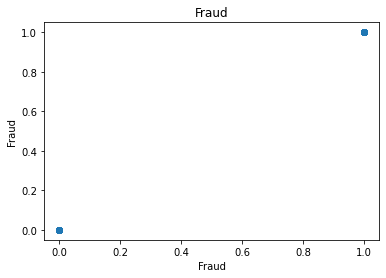

In [26]:
for feature in numerical_features:
    df=data.copy()
    plt.scatter(df[feature], data["Fraud"])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Fraud")
    plt.show()
    

### correlation of numerical features


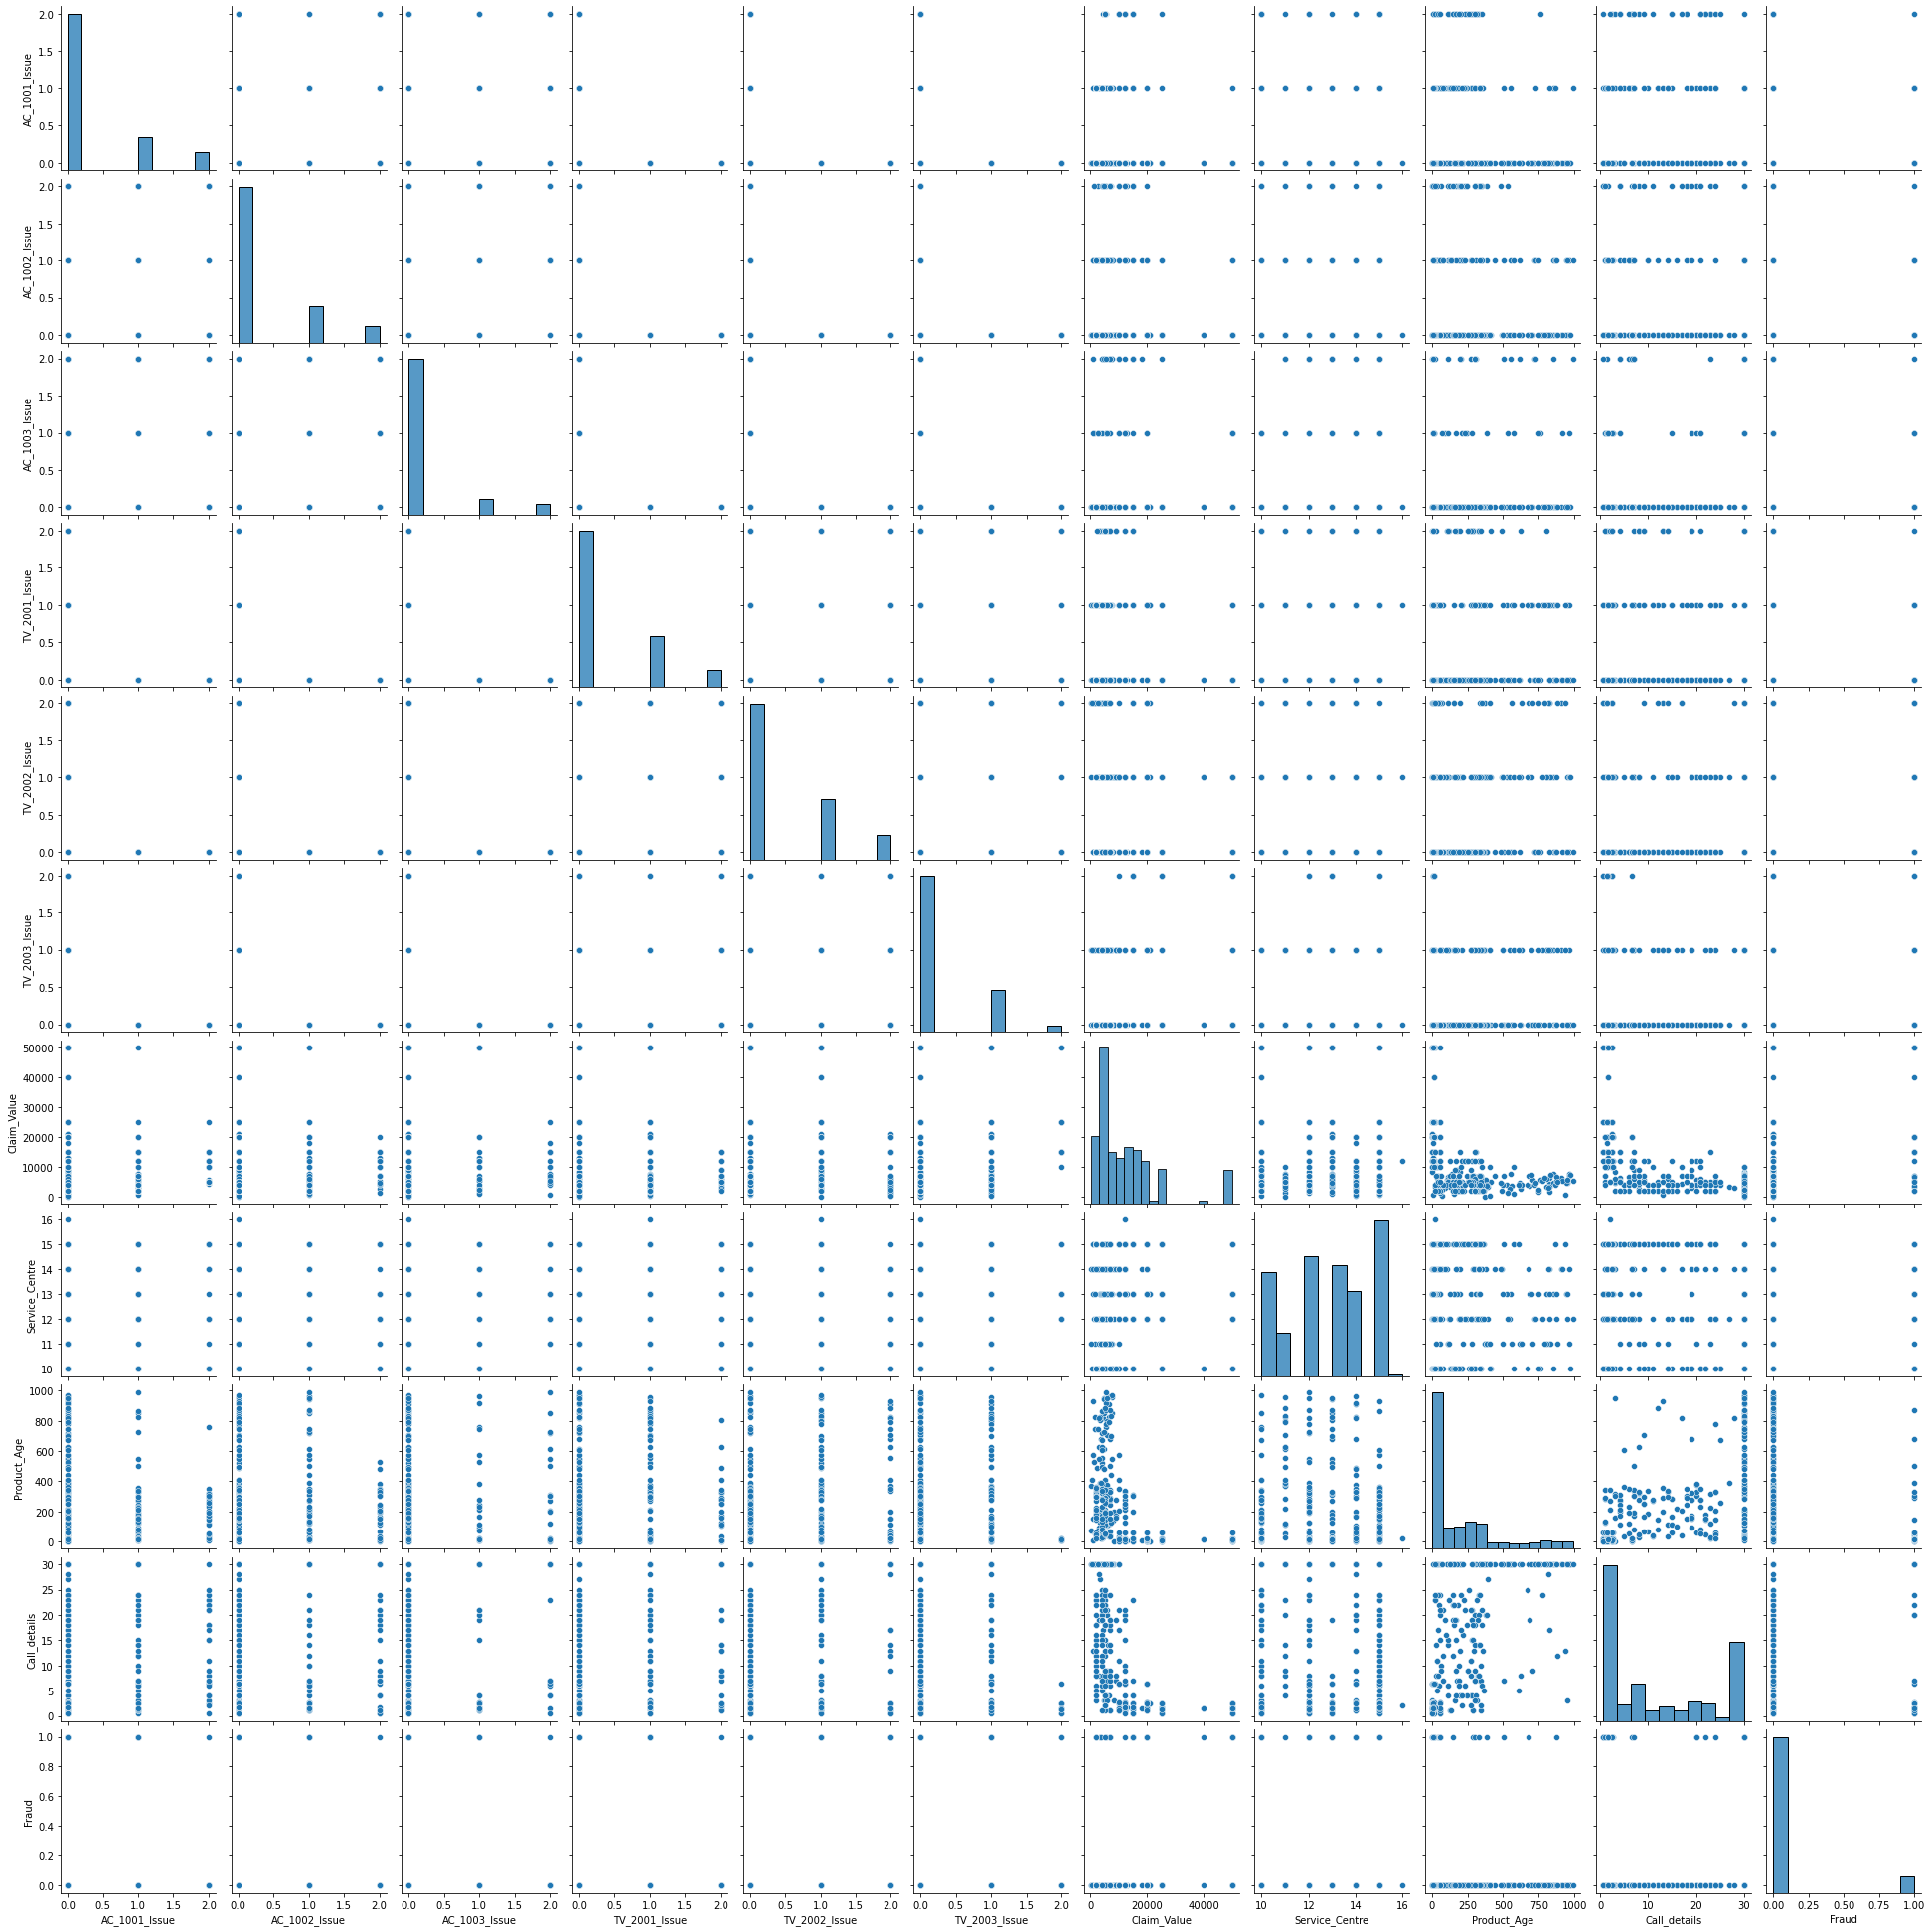

In [27]:
sns.pairplot(data)

In [28]:
data.corr()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
AC_1001_Issue,1.000000,0.468584,0.266681,-0.321085,-0.357181,-0.279346,-0.176595,0.066168,-0.005918,0.045816,-0.054376
AC_1002_Issue,0.468584,1.000000,0.480978,-0.325770,-0.362392,-0.283422,-0.119701,0.116185,0.068414,0.091954,-0.069450
AC_1003_Issue,0.266681,0.480978,1.000000,-0.234121,-0.260440,-0.203687,-0.003030,0.070839,0.106377,0.068399,-0.038005
TV_2001_Issue,-0.321085,-0.325770,-0.234121,1.000000,0.482737,0.388042,-0.173108,-0.009520,0.168359,0.115679,-0.003003
TV_2002_Issue,-0.357181,-0.362392,-0.260440,0.482737,1.000000,0.456304,-0.138048,-0.084317,0.247202,0.279644,0.086503
TV_2003_Issue,-0.279346,-0.283422,-0.203687,0.388042,0.456304,1.000000,0.066802,0.027963,0.056517,0.020613,0.066967
Claim_Value,-0.176595,-0.119701,-0.003030,-0.173108,-0.138048,0.066802,1.000000,-0.018192,-0.432630,-0.547506,0.239992
Service_Centre,0.066168,0.116185,0.070839,-0.009520,-0.084317,0.027963,-0.018192,1.000000,-0.123943,-0.120344,-0.023720
Product_Age,-0.005918,0.068414,0.106377,0.168359,0.247202,0.056517,-0.432630,-0.123943,1.000000,0.647403,-0.106918
Call_details,0.045816,0.091954,0.068399,0.115679,0.279644,0.020613,-0.547506,-0.120344,0.647403,1.000000,-0.105117


<AxesSubplot:>

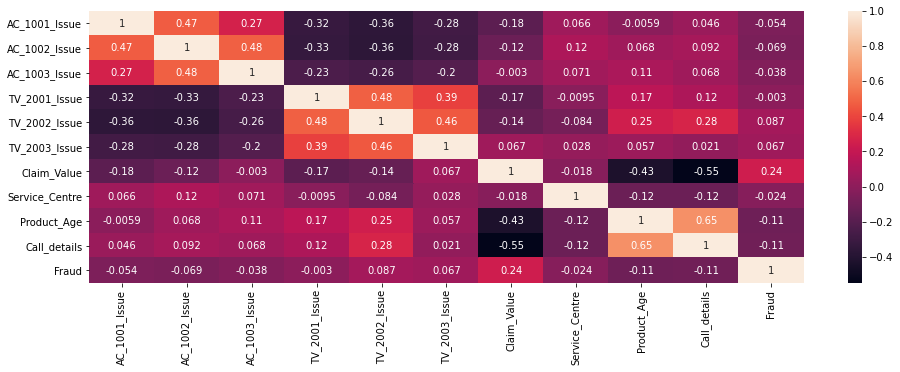

In [29]:
plt.figure(figsize=(16,5))
sns.heatmap(data.corr(), annot=True)

## Feature_Engineering

### outlier handeling and Detection by using IQR

In [30]:

Q1=np.percentile(data["Claim_Value"],25, interpolation="midpoint")
Q3=np.percentile(data["Claim_Value"],75, interpolation="midpoint")
IQR_claim=Q3-Q1
upper_bound=Q3+1.5*IQR_claim
lower_bound=Q1-1.5*IQR_claim
data["Claim_Value"]=np.where(data["Claim_Value"]<lower_bound, data["Claim_Value"].median(), data["Claim_Value"])
data["Claim_Value"]=np.where(data["Claim_Value"]>upper_bound, data["Claim_Value"].median(), data["Claim_Value"])

In [31]:
Q11=np.percentile(data["Product_Age"],25, interpolation="midpoint")
Q31=np.percentile(data["Product_Age"],75, interpolation="midpoint")
IQR_product=Q31-Q11
upper_bound_p=Q31+1.5*IQR_product
lower_bound_p=Q11-1.5*IQR_product
data["Product_Age"]=np.where(data["Product_Age"]<lower_bound_p, data["Product_Age"].median(), data["Product_Age"])
data["Product_Age"]=np.where(data["Product_Age"]>upper_bound_p, data["Product_Age"].median(), data["Product_Age"])

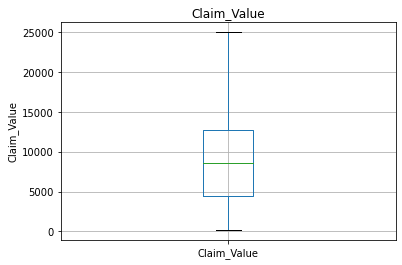

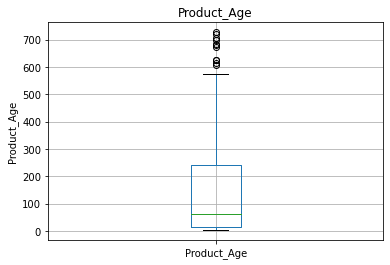

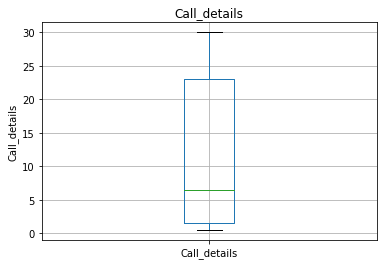

In [32]:
for feature in contineous_features:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [33]:
print(upper_bound,lower_bound)

30821.25 -11368.75


In [34]:
print(upper_bound_p,lower_bound_p)

737.75 -420.25


####  features on which we applied one hot encoding just because these features contains more categorical values 

In [35]:

dumi_features=[feature for feature in data.columns if data[feature].dtypes=="O" and len(data[feature].unique())>3]
data[dumi_features].head()

,Region,State,City
0,South,Karnataka,Bangalore
1,South,Karnataka,Bangalore
2,North,Haryana,Chandigarh
3,South,Tamil Nadu,Chennai
4,North East,Jharkhand,Ranchi


In [36]:
dumi_features=pd.get_dummies(data[dumi_features])
dumi_features.head(5)

,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,State_Assam,...,City_Panaji,City_Patna,City_Pune,City_Purnea,City_Ranchi,City_Shimla,City_Srinagar,City_Vadodara,City_Vijayawada,City_Vizag
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
dumi_features.shape

(358, 55)

#### Features on which we apply Lable Encoding just because these contaied 2 or 2 categories

In [38]:
data.head(2)

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60.0,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10.0,Dealer,1.0,Complaint,0


In [39]:
en_features= [feature for feature in data.columns if data[feature].dtypes=="O" and len(data[feature].unique())<=3]
df[en_features]

,Area,Consumer_profile,Product_category,Product_type,Purchased_from,Purpose
0,Urban,Business,Entertainment,TV,Manufacturer,Complaint
1,Rural,Business,Household,AC,Dealer,Complaint
2,Urban,Personal,Household,AC,Dealer,Claim
3,Urban,Business,Entertainment,TV,Manufacturer,Complaint
4,Rural,Personal,Entertainment,TV,Dealer,Claim
...,...,...,...,...,...,...
353,Rural,Personal,Entertainment,TV,Manufacturer,Complaint
354,Rural,Personal,Entertainment,TV,Manufacturer,Complaint
355,Urban,Personal,Entertainment,TV,Dealer,Claim
356,Urban,Personal,Household,AC,Manufacturer,Claim


In [40]:
from sklearn.preprocessing import LabelEncoder



In [41]:
for feature in en_features:
    number=LabelEncoder()
    data[feature]=number.fit_transform(data[feature])
    
    

In [42]:
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,1,Bangalore,0,0,1,0,0,0,1,2,0,15000.0,10,60.0,2,0.5,1,1
1,South,Karnataka,0,Bangalore,0,1,0,1,1,0,0,0,0,20000.0,12,10.0,0,1.0,1,0
2,North,Haryana,1,Chandigarh,1,1,0,0,1,2,0,0,0,18000.0,14,10.0,0,1.4,0,0
3,South,Tamil Nadu,1,Chennai,0,0,1,0,0,0,1,1,0,12000.0,16,20.0,2,2.0,1,0
4,North East,Jharkhand,0,Ranchi,1,0,1,0,0,0,0,1,2,25000.0,15,6.0,0,1.3,0,0


In [43]:
data2=data.drop(["Region","State","City"],axis=1)
data2.head(2)

,Area,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,1,0,0,1,0,0,0,1,2,0,15000.0,10,60.0,2,0.5,1,1
1,0,0,1,0,1,1,0,0,0,0,20000.0,12,10.0,0,1.0,1,0


In [44]:
DF_final=pd.concat([dumi_features,data2], axis=1)
DF_final.head()

,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,State_Assam,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,0,0,0,1,0,0,0,0,0,...,1,2,0,15000.0,10,60.0,2,0.5,1,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,20000.0,12,10.0,0,1.0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,18000.0,14,10.0,0,1.4,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,1,0,12000.0,16,20.0,2,2.0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,2,25000.0,15,6.0,0,1.3,0,0


### data scaling we are scaling data for features on we apply LableEncoding. we does not apply it on output variable

In [45]:
scale_data=[feature for feature in DF_final.columns if feature not in "Fraud"]
scale_data

['Region_East',
 'Region_North',
 'Region_North East',
 'Region_North West',
 'Region_South',
 'Region_South East',
 'Region_South West',
 'Region_West',
 'State_Andhra Pradesh',
 'State_Assam',
 'State_Bihar',
 'State_Delhi',
 'State_Goa',
 'State_Gujarat',
 'State_Haryana',
 'State_Himachal Pradesh',
 'State_Jammu and Kashmir',
 'State_Jharkhand',
 'State_Karnataka',
 'State_Kerala',
 'State_Madhya Pradesh',
 'State_Maharashtra',
 'State_Orissa',
 'State_Rajasthan',
 'State_Tamil Nadu',
 'State_Tripura',
 'State_Uttar Pradesh',
 'State_West Bengal',
 'City_Agartala',
 'City_Ahmedabad',
 'City_Bangalore',
 'City_Bhopal',
 'City_Bhubaneswar',
 'City_Chandigarh',
 'City_Chennai',
 'City_Delhi',
 'City_Guwhati',
 'City_Hyderabad',
 'City_Jaipur',
 'City_Kochi',
 'City_Kolkata',
 'City_Lucknow',
 'City_Meerut',
 'City_Mumbai',
 'City_New Delhi',
 'City_Panaji',
 'City_Patna',
 'City_Pune',
 'City_Purnea',
 'City_Ranchi',
 'City_Shimla',
 'City_Srinagar',
 'City_Vadodara',
 'City_Vijayawad

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(DF_final[scale_data])


array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01694915,
        0.5       ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.03050847,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.28813559,
        0.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.03389831,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.22033898,
        0.5       ]])

In [47]:
data4=pd.concat([pd.DataFrame(scaler.fit_transform(DF_final[scale_data]), columns = scale_data),(DF_final[["Fraud"]].reset_index(drop=True))], axis=1)
data4.head()

,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,State_Assam,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.5,1.0,0.0,0.597261,0.000000,0.078729,1.0,0.000000,0.5,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.798631,0.333333,0.009669,0.0,0.016949,0.5,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.718083,0.666667,0.009669,0.0,0.030508,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.0,0.476440,1.000000,0.023481,1.0,0.050847,0.5,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,1.0,1.000000,0.833333,0.004144,0.0,0.027119,0.0,0


In [48]:
data4.to_csv('dataframe.csv', index=False)

In [49]:
data_f=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Project\\dataframe.csv")

## Feature Selection 

In [50]:
data_f.head()

,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,State_Assam,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.5,1.0,0.0,0.597261,0.000000,0.078729,1.0,0.000000,0.5,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.798631,0.333333,0.009669,0.0,0.016949,0.5,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.718083,0.666667,0.009669,0.0,0.030508,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.0,0.476440,1.000000,0.023481,1.0,0.050847,0.5,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,1.0,1.000000,0.833333,0.004144,0.0,0.027119,0.0,0


In [51]:
x=data_f.iloc[:,0:71]
y=data_f.iloc[:,-1]


## Handling imbalanced data

In [52]:
# we are checking fraud and non fraud entries
fraud=data_f[data_f["Fraud"]==1]
non_fraud=data_f[data_f["Fraud"]==0]

In [53]:
# here we get total no of fraud and non fraud entries 
# from here it is clear that data is imbalanced
(fraud.shape, non_fraud.shape)

((35, 72), (323, 72))

In [54]:
#!pip install imblearn
#!pip install delayed
#!pip install imbalanced-learn
#!pip install nb 

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
#from imblearn.combine import SMOTETomek 

In [57]:
# implimenting SMOTE for handlling imbalanced data
smt=SMOTE(random_state=40)
x_res, y_res=smt.fit_resample(x,y)

In [58]:
(x_res.shape, y_res.shape)

((646, 71), (646,))

### Data frame of balanced data

In [59]:
sm_df=pd.concat([x_res,y_res], axis=1)
sm_df.head()

,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,State_Assam,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.5,1.0,0.0,0.597261,0.000000,0.078729,1.0,0.000000,0.5,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.798631,0.333333,0.009669,0.0,0.016949,0.5,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.718083,0.666667,0.009669,0.0,0.030508,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.0,0.476440,1.000000,0.023481,1.0,0.050847,0.5,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,1.0,1.000000,0.833333,0.004144,0.0,0.027119,0.0,0


In [60]:
sm_df.shape

(646, 72)

In [61]:
sm_df["Fraud"].value_counts()

1    323
0    323
Name: Fraud, dtype: int64

### Feature Selection by using Recursive Feature Elimination method

In [62]:
X=sm_df.iloc[:,0:71]
Y=sm_df.iloc[:,-1]


In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression




# feature extraction
model = LogisticRegression()
rfe = RFE(model,  n_features_to_select=40, step=1 )
fit = rfe.fit(X, Y)

In [64]:
sel_feature_rfe=fit.get_support()

In [65]:
selected_features_rfe=X.columns[sel_feature_rfe]
selected_features_rfe

Index(['Region_East', 'Region_North', 'Region_North East', 'Region_North West',
       'Region_South East', 'Region_South West', 'State_Assam', 'State_Bihar',
       'State_Gujarat', 'State_Jharkhand', 'State_Kerala', 'State_Maharashtra',
       'State_Orissa', 'State_Tamil Nadu', 'State_West Bengal',
       'City_Ahmedabad', 'City_Bhubaneswar', 'City_Chennai', 'City_Delhi',
       'City_Guwhati', 'City_Hyderabad', 'City_Kochi', 'City_Kolkata',
       'City_Meerut', 'City_Patna', 'City_Pune', 'City_Ranchi',
       'City_Vijayawada', 'City_Vizag', 'Area', 'Consumer_profile',
       'AC_1001_Issue', 'AC_1002_Issue', 'TV_2001_Issue', 'TV_2002_Issue',
       'Claim_Value', 'Service_Centre', 'Purchased_from', 'Call_details',
       'Purpose'],
      dtype='object')

In [66]:
len(selected_features_rfe)

40

In [67]:
data_rfe=pd.DataFrame(sm_df[selected_features_rfe])
data_rfe.head()

,Region_East,Region_North,Region_North East,Region_North West,Region_South East,Region_South West,State_Assam,State_Bihar,State_Gujarat,State_Jharkhand,...,Consumer_profile,AC_1001_Issue,AC_1002_Issue,TV_2001_Issue,TV_2002_Issue,Claim_Value,Service_Centre,Purchased_from,Call_details,Purpose
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,1.0,0.597261,0.000000,1.0,0.000000,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.5,0.0,0.0,0.798631,0.333333,0.0,0.016949,0.5
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.5,0.0,0.0,0.718083,0.666667,0.0,0.030508,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.5,0.476440,1.000000,1.0,0.050847,0.5
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.5,1.000000,0.833333,0.0,0.027119,0.0


In [68]:
dataset1=pd.concat([data_rfe,sm_df["Fraud"]],axis=1)
dataset1.head()

,Region_East,Region_North,Region_North East,Region_North West,Region_South East,Region_South West,State_Assam,State_Bihar,State_Gujarat,State_Jharkhand,...,AC_1001_Issue,AC_1002_Issue,TV_2001_Issue,TV_2002_Issue,Claim_Value,Service_Centre,Purchased_from,Call_details,Purpose,Fraud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,1.0,0.597261,0.000000,1.0,0.000000,0.5,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.0,0.0,0.798631,0.333333,0.0,0.016949,0.5,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.718083,0.666667,0.0,0.030508,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.5,0.476440,1.000000,1.0,0.050847,0.5,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.5,1.000000,0.833333,0.0,0.027119,0.0,0


#### Declairation of x and y of selected feature by using RFE 

In [69]:
x1=dataset1.iloc[:,0:40]
y1=dataset1.iloc[:,-1]


### Feature Selection by using Lasso method

In [70]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [71]:
## First I specify the Lasso regression model
## then i select a suitable alpha (equivalent of penelty)
## then i use selectfrom model from sklearn so as to select the features with non-zero coefficients
feature_select_model=SelectFromModel(Lasso(alpha=0.001, random_state=0))
feature_select_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [72]:
feature_select_model.get_support()

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True])

In [73]:
## List of selected features
selected_features=X.columns[feature_select_model.get_support()]
selected_features

Index(['Region_East', 'Region_North', 'Region_North West', 'Region_South East',
       'Region_South West', 'Region_West', 'State_Andhra Pradesh',
       'State_Assam', 'State_Bihar', 'State_Delhi', 'State_Gujarat',
       'State_Jharkhand', 'State_Kerala', 'State_Madhya Pradesh',
       'State_Maharashtra', 'State_Orissa', 'State_Tamil Nadu',
       'State_West Bengal', 'City_Ahmedabad', 'City_Bangalore',
       'City_Bhubaneswar', 'City_Chennai', 'City_Delhi', 'City_Guwhati',
       'City_Hyderabad', 'City_Kolkata', 'City_Lucknow', 'City_Meerut',
       'City_Patna', 'City_Pune', 'City_Ranchi', 'City_Vijayawada',
       'City_Vizag', 'Area', 'Consumer_profile', 'Product_category',
       'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue', 'TV_2001_Issue',
       'TV_2002_Issue', 'TV_2003_Issue', 'Claim_Value', 'Service_Centre',
       'Purchased_from', 'Call_details', 'Purpose'],
      dtype='object')

In [74]:
len(selected_features)

47

In [75]:
data5=pd.DataFrame(sm_df[selected_features])
data5.head()

,Region_East,Region_North,Region_North West,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,State_Assam,State_Bihar,State_Delhi,...,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Purchased_from,Call_details,Purpose
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,1.0,0.0,0.597261,0.000000,1.0,0.000000,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.798631,0.333333,0.0,0.016949,0.5
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,1.0,0.0,0.0,0.0,0.718083,0.666667,0.0,0.030508,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.5,0.0,0.476440,1.000000,1.0,0.050847,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,1.0,1.000000,0.833333,0.0,0.027119,0.0


In [76]:
data5.shape

(646, 47)

In [77]:
dataset2=pd.concat([data5, sm_df["Fraud"]],axis=1)
dataset2.head()

,Region_East,Region_North,Region_North West,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,State_Assam,State_Bihar,State_Delhi,...,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Purchased_from,Call_details,Purpose,Fraud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,1.0,0.0,0.597261,0.000000,1.0,0.000000,0.5,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.798631,0.333333,0.0,0.016949,0.5,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.718083,0.666667,0.0,0.030508,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.5,0.0,0.476440,1.000000,1.0,0.050847,0.5,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,1.0,1.000000,0.833333,0.0,0.027119,0.0,0


In [78]:
x2=dataset2.iloc[:,0:47]
y2=dataset2.iloc[:,-1]


## As we selected 21 features as shown above and we created a dataframe by using those features with output variable. lets split data into train test data 

#### X,Y all features after applying smote
#### x1,y1 RFE features
#### x2,y2 Lasso features

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=0, stratify=Y)
(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((516, 71), (130, 71), (516,), (130,))

In [80]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x1,y1,test_size=0.2, random_state=0, stratify=y1)
(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

((516, 40), (130, 40), (516,), (130,))

In [81]:
x2_train, x2_test, y2_train, y2_test=train_test_split(x2,y2,test_size=0.2, random_state=0, stratify=y2)
(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

((516, 47), (130, 47), (516,), (130,))

## Model building

## Logistic Regression Model

### Model building by using Lasso features

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [83]:
def predict_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    
    y_pred_train=model.predict(x_train)
    accuracy=np.round(accuracy_score(y_train, y_pred_train)*100,2)
    print("Training accuracy {} %".format(accuracy))
    print(" ")
    print(classification_report(y_train,y_pred_train))
    
    y_pred_test=model.predict(x_test)
    accuracy=np.round(accuracy_score(y_test, y_pred_test)*100,2)
    print("Testing accuracy {} %".format(accuracy))
    print(" ")
    print(classification_report(y_test,y_pred_test))
    results=np.round(cross_val_score(model,x,y, cv=10).mean()*100,2)
    print("cross_val accuracy {} %".format(results.mean()))
    

### Model accuracy with all features

In [84]:
X=sm_df.iloc[:,0:71]
Y=sm_df.iloc[:,-1]

model=LogisticRegression()
predict_model(model,X_train,X_test,Y_train,Y_test)

Training accuracy 85.27 %
 
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       258
           1       0.82      0.91      0.86       258

    accuracy                           0.85       516
   macro avg       0.86      0.85      0.85       516
weighted avg       0.86      0.85      0.85       516

Testing accuracy 83.08 %
 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        65
           1       0.79      0.89      0.84        65

    accuracy                           0.83       130
   macro avg       0.84      0.83      0.83       130
weighted avg       0.84      0.83      0.83       130

cross_val accuracy 86.6 %


### Accuracy with RFE features 

In [85]:
x1=dataset1.iloc[:,0:40]
y1=dataset1.iloc[:,-1]

model=LogisticRegression()
predict_model(model,x1_train,x1_test,y1_train,y1_test)

Training accuracy 85.47 %
 
              precision    recall  f1-score   support

           0       0.90      0.79      0.85       258
           1       0.82      0.91      0.86       258

    accuracy                           0.85       516
   macro avg       0.86      0.85      0.85       516
weighted avg       0.86      0.85      0.85       516

Testing accuracy 83.08 %
 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        65
           1       0.79      0.89      0.84        65

    accuracy                           0.83       130
   macro avg       0.84      0.83      0.83       130
weighted avg       0.84      0.83      0.83       130

cross_val accuracy 86.6 %


### Model accuracy with Lasso features

In [86]:
x2=dataset2.iloc[:,0:47]
y2=dataset2.iloc[:,-1]

model=LogisticRegression()
predict_model(model,x2_train,x2_test,y2_train,y2_test)

Training accuracy 85.66 %
 
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       258
           1       0.82      0.91      0.86       258

    accuracy                           0.86       516
   macro avg       0.86      0.86      0.86       516
weighted avg       0.86      0.86      0.86       516

Testing accuracy 82.31 %
 
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        65
           1       0.79      0.88      0.83        65

    accuracy                           0.82       130
   macro avg       0.83      0.82      0.82       130
weighted avg       0.83      0.82      0.82       130

cross_val accuracy 86.6 %


# KNN

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Grid Search CV for selecting Hyperparameter 

### Accuracy with all features

In [88]:
X=sm_df.iloc[:,0:71]
Y=sm_df.iloc[:,-1]

In [89]:
def gridsearchcv(X,Y):
    n_neighbors=np.array(range(3,50))
    param_grid=dict(n_neighbors=n_neighbors)
    model=KNeighborsClassifier()
    Grid=GridSearchCV(estimator=model, param_grid=param_grid)
    Grid.fit(X,Y)
    print(Grid.best_score_,Grid.best_params_)

    

In [90]:
gridsearchcv(X,Y)

0.7709361955873585 {'n_neighbors': 4}


In [91]:
model=KNeighborsClassifier(n_neighbors=4)
predict_model(model,X_train,X_test,Y_train,Y_test)

Training accuracy 93.02 %
 
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       258
           1       0.89      0.98      0.93       258

    accuracy                           0.93       516
   macro avg       0.93      0.93      0.93       516
weighted avg       0.93      0.93      0.93       516

Testing accuracy 85.38 %
 
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        65
           1       0.79      0.95      0.87        65

    accuracy                           0.85       130
   macro avg       0.87      0.85      0.85       130
weighted avg       0.87      0.85      0.85       130

cross_val accuracy 85.23 %


### Accuracy with RFE feature

In [92]:

x1=dataset1.iloc[:,0:40]
y1=dataset1.iloc[:,-1]

gridsearchcv(x1,y1)

0.7987954680977938 {'n_neighbors': 4}


In [93]:
model=KNeighborsClassifier(n_neighbors=4)
predict_model(model,x1_train,x1_test,y1_train,y1_test)

Training accuracy 93.22 %
 
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       258
           1       0.89      0.98      0.94       258

    accuracy                           0.93       516
   macro avg       0.94      0.93      0.93       516
weighted avg       0.94      0.93      0.93       516

Testing accuracy 86.15 %
 
              precision    recall  f1-score   support

           0       0.94      0.77      0.85        65
           1       0.81      0.95      0.87        65

    accuracy                           0.86       130
   macro avg       0.87      0.86      0.86       130
weighted avg       0.87      0.86      0.86       130

cross_val accuracy 85.23 %


### Accuracy with Lasso Features 

In [94]:
x2=dataset2.iloc[:,0:47]
y2=dataset2.iloc[:,-1]
gridsearchcv(x2,y2)

0.7786642814549791 {'n_neighbors': 4}


In [95]:
model=KNeighborsClassifier(n_neighbors=4)
predict_model(model,x2_train,x2_test,y2_train,y2_test)

Training accuracy 93.8 %
 
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       258
           1       0.90      0.99      0.94       258

    accuracy                           0.94       516
   macro avg       0.94      0.94      0.94       516
weighted avg       0.94      0.94      0.94       516

Testing accuracy 85.38 %
 
              precision    recall  f1-score   support

           0       0.94      0.75      0.84        65
           1       0.79      0.95      0.87        65

    accuracy                           0.85       130
   macro avg       0.87      0.85      0.85       130
weighted avg       0.87      0.85      0.85       130

cross_val accuracy 85.23 %


# SVM

In [96]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Grid search cv to select "c" value

In [97]:
def gridsearchcv(X,Y):
    clf=SVC(kernel='rbf', random_state=5)
    clf.fit(X_train,Y_train)
    
    param_grid=[{'kernel':['rbf','linear'], 'C':[20,10,15,13,17,19,25,50], 'gamma':[0.1,0.2,0.5,0.8,0.9,1.0]}]
    gsv=GridSearchCV( estimator = clf, param_grid=param_grid ,cv=10)
    grid_search=gsv.fit(X_train,Y_train)
    print(gsv.best_params_, gsv.best_score_)
    

### Accuracy with all features 

In [98]:
X=sm_df.iloc[:,0:71]
Y=sm_df.iloc[:,-1]
gridsearchcv(X,Y)

{'C': 13, 'gamma': 0.5, 'kernel': 'rbf'} 0.945814479638009


In [99]:
model=SVC(kernel='rbf', C=13, gamma=0.5)
predict_model(model,X_train,X_test,Y_train,Y_test)

Training accuracy 97.29 %
 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       258
           1       0.95      1.00      0.97       258

    accuracy                           0.97       516
   macro avg       0.97      0.97      0.97       516
weighted avg       0.97      0.97      0.97       516

Testing accuracy 98.46 %
 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.98      0.98      0.98        65

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130

cross_val accuracy 86.05 %


### Accuracy with RFE features 

In [100]:
x1=dataset1.iloc[:,0:40]
y1=dataset1.iloc[:,-1]
gridsearchcv(x1,y1)

{'C': 13, 'gamma': 0.5, 'kernel': 'rbf'} 0.945814479638009


In [101]:
model=SVC(kernel='rbf', C=13, gamma=0.5)
predict_model(model,x1_train,x1_test,y1_train,y1_test)

Training accuracy 96.9 %
 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       258
           1       0.94      1.00      0.97       258

    accuracy                           0.97       516
   macro avg       0.97      0.97      0.97       516
weighted avg       0.97      0.97      0.97       516

Testing accuracy 96.92 %
 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        65
           1       0.96      0.98      0.97        65

    accuracy                           0.97       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130

cross_val accuracy 86.05 %


### Accuracy with Lasso features

In [102]:
x2=dataset2.iloc[:,0:47]
y2=dataset2.iloc[:,-1]
gridsearchcv(x2,y2)

{'C': 13, 'gamma': 0.5, 'kernel': 'rbf'} 0.945814479638009


In [103]:
model=SVC(kernel='rbf', C=13, gamma=0.5)
predict_model(model,x2_train,x2_test,y2_train,y2_test)

Training accuracy 97.29 %
 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       258
           1       0.95      1.00      0.97       258

    accuracy                           0.97       516
   macro avg       0.97      0.97      0.97       516
weighted avg       0.97      0.97      0.97       516

Testing accuracy 97.69 %
 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.97      0.98      0.98        65

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130

cross_val accuracy 86.05 %


## we are going to deploy SVM model with Lasso features due to high accuracy

In [105]:
import pickle

In [106]:
x2=dataset2.iloc[:,0:47]
y2=dataset2.iloc[:,-1]

In [107]:
from sklearn.svm import SVC
model=SVC(kernel='rbf', C=13, gamma=0.5)
model.fit(x2_train,y2_train)

SVC(C=13, gamma=0.5)

In [108]:
with open("model_pickle", "wb") as f:
    pickle.dump(model,f)

In [109]:
with open("model_pickle", "rb") as f:
    mp=pickle.load(f)

In [110]:
mp.predict(x2_test)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1],
      dtype=int64)

### We are creating here unscaled data frame for model building of Decision Tree and Random Forest 

## Unscale data frame 


In [104]:
data_us=DF_final.to_csv('df_us.csv')